In [ ]:
import pyvo as vo
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.utils.data import download_file
from astropy.io import fits
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry
import pandas as pd


In [ ]:
%matplotlib inline


# Extracting a galaxy through the WISE image service

##  For NGC 7793 

In [ ]:
# using the website that Irsa.ipac relocates you that has a full explanationm of all the code you need
#using NGC 5128: ra= 201.365	dec= -43.019
#SWITCHED it to NGC 7793 ra= 359.45700000000016 dec= -32.592000000000013

#define coordinates	
ra= 359.45700000000016
dec= -32.592000000000013
pos = SkyCoord(ra=ra, dec=dec, unit= 'deg')
print(pos)

In [ ]:
# Lookup and define a service for ALLWISE Atlas images
# the website gave me the URL
allwise_service = vo.dal.SIAService("https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?")


In [ ]:
#search the service for images covering within 1 arcsecond of the star. make this bigger if needed
im_table = allwise_service.search(pos=pos, size= 1*u.arcsec)
#im_table

In [ ]:
im_table.to_table().colnames

In [ ]:
im_table.to_table()['sia_url']

In [ ]:
im_table.to_table()['sia_bp_id']
# i believe this gives us the different bandpasses that you can view the image in. 

In [ ]:
for i in range(len(im_table)):
    print(im_table[i])

In [ ]:
#search for the image in the W3 band image
# using a for loop i assume because it may be printed multiple times maybe?
# i printed it above, it could just be because the ID of the one object is printed 4 times due to there being 4 bandpasses but if you define it at W3 not sure why this is all necessary

for i in range(len(im_table)):
    if im_table[i]['sia_bp_id'] == 'W1':
        break
print(im_table[i].getdataurl())
# ahh yes, so the it runs over the "i" in the dataset until it finds W3 and then stops 
# so using "break" makes the for loop stop after it finds the ID of the object inside of W3
# this is prolly very useful if i am looking for multiple objects.

In [ ]:
#Download the image and open it in Astropy
fname = download_file(im_table[i].getdataurl(), cache=True)
image1= fits.open(fname)
image= image1[0].data
plt.imshow(image, origin = 'lower', vmax = 50)
#plt.xlim(3000,4000)
#plt.ylim(3700,4100)

In [ ]:
#extract a cutout and plot it
wcs = WCS(image1[0].header)
print(image1[0].header)
wcs


In [ ]:
#cuting out the image of the galaxy apart from the rest of the background.
cutout = Cutout2D(image, pos, (400,400), wcs=wcs)
wcs = cutout.wcs

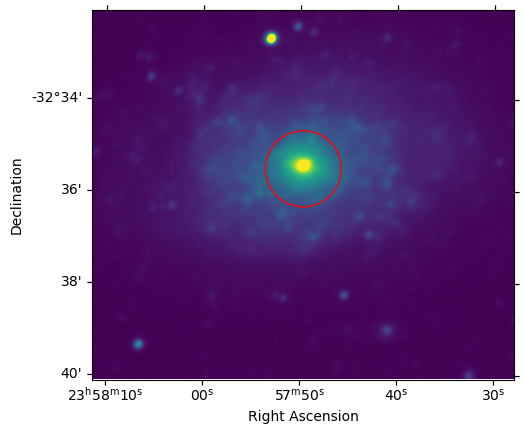

In [337]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection = wcs)

#vmax at 4000 gives you the (bulge maybe?) right in the center of it
ax.imshow(cutout.data, origin='lower', vmax = 50)

ax.scatter(ra, dec, transform= ax.get_transform('fk5'), facecolor= 'None', s=3000, edgecolor = 'red', alpha = 1)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
#Axis. get_transform() function in axis module of matplotlib library is used to get the "Transform instance used by this artist"

## For NGC 5128


('W4 Coadd 2022m425_ac51', 'https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/20/2022/2022m425_ac51/2022m425_ac51-w4-int-3.fits', '{"aws": {"bucket_name": "nasa-irsa-wise", "key":"wise/allwise/images/p3am_cdd/20/2022/2022m425_ac51/2022m425_ac51-w4-int-3.fits", "region": "us-west-2"}}', 2, 'image/fits', 202.248532, -42.404444, array([4095, 4095], dtype=int32), array([2048., 2048.]), array([202.248532, -42.404444]), 'SIN', array([-0.00038194,  0.00038194]), array([-0.00038194, -0.        , -0.        ,  0.00038194]), 'W4', 2.209e-05, 2.336e-05, 1.984e-05, 'm', 13.0, 0.012, 'https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/20/2022/2022m425_ac51/2022m425_ac51-w4-unc-3.fits.gz', 'https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/20/2022/2022m425_ac51/2022m425_ac51-w4-cov-3.fits.gz', '2022m425_ac51')
('W2 Coadd 2022m425_ac51', 'https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/20/2022/2022m425_ac51/2022m425_ac51-w2-int-3.fits', '{"aws": {"bucket_n

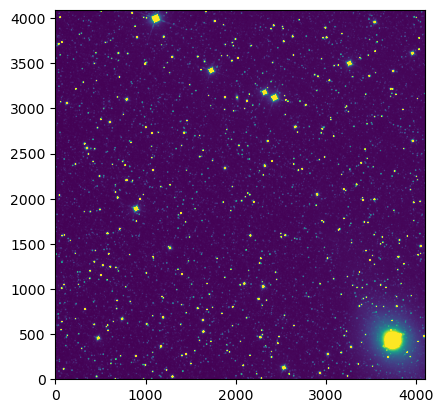

In [338]:
# using the website that Irsa.ipac relocates you that has a full explanationm of all the code you need
#using NGC 5128: ra= 201.365	dec= -43.019
#SWITCHED it to NGC 7793 ra= 359.45700000000016 dec= -32.592000000000013

#define coordinates	
ra= 201.365	
dec= -43.019

pos = SkyCoord(ra=ra, dec=dec, unit= 'deg')
#print(pos)

# Lookup and define a service for ALLWISE Atlas images
# the website gave me the URL
allwise_service = vo.dal.SIAService("https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?")

#search the service for images covering within 1 arcsecond of the star. make this bigger if needed
im_table = allwise_service.search(pos=pos, size= 1*u.arcsec)
#im_table


im_table.to_table().colnames
im_table.to_table()['sia_url']
im_table.to_table()['sia_bp_id'] # i believe this gives us the different bandpasses that you can view the image in. 


for i in range(len(im_table)):
    print(im_table[i])

    #search for the image in the W3 band image

for i in range(len(im_table)):
    if im_table[i]['sia_bp_id'] == 'W1':
        break
print(im_table[i].getdataurl())


#Download the image and open it in Astropy
fname = download_file(im_table[i].getdataurl(), cache=True)
image1= fits.open(fname)
image= image1[0].data
plt.imshow(image, origin = 'lower', vmax = 50)
#plt.xlim(3000,4000)
#plt.ylim(3700,4100)

#extract a cutout and plot it
wcs = WCS(image1[0].header)
print(image1[0].header)
wcs


#cuting out the image of the galaxy apart from the rest of the background.
cutout = Cutout2D(image, pos, (400,400), wcs=wcs)
wcs = cutout.wcs




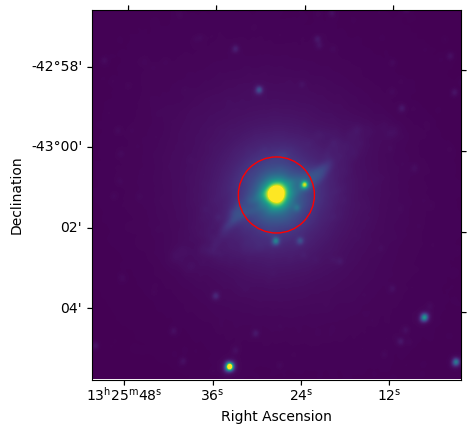

In [348]:
# plotting the image
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection = wcs)

#vmax at 4000 gives you the (bulge maybe?) right in the center of it
ax.imshow(cutout.data, origin='lower', vmax = 1000)

ax.scatter(ra, dec, transform= ax.get_transform('fk5'), facecolor= 'None', s=3000, edgecolor = 'red', alpha = 1)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
#Axis. get_transform() function in axis module of matplotlib library is used to get the "Transform instance used by this artist"

# Exploring the downloadable FITS provided by the website 
to understand the properties of the image

In [ ]:
# looking at the WISE specific fits
hdul = fits.open('../Data/image_WISE-Band-1.fits')
hdul.info()

In [ ]:
hdr = fits.getheader('../Data/image_WISE-Band-1.fits')
hdr
#the units are in units of intensity "DN"

In [ ]:
#opening the image in a way similar to astroimagej
# for single aperture
hdul = fits.open('../Data/image_WISE-Band-1.fits')
phdul = hdul[0].data
plt.imshow(phdul, vmax = 40, origin='lower')

#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(230,230,50)] #and , (180,340,50)

#create aperture objects
aperture = [CircularAperture((x,y),r) for (x,y,r) in ROI]


#perform aperture photometry
photo_table = aperture_photometry(phdul, aperture)
print(photo_table)
#results
for i, aperture in  enumerate(aperture):
    flux = photo_table['aperture_sum_0'][i]
print(flux)
hdul.close()

In [ ]:
# for multiple apertures
hdul = fits.open('../Data/image_WISE-Band-1.fits')
phdul = hdul[0].data
plt.imshow(phdul, vmax = 40, origin='lower')

#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(220,220,100), (186,341,11)] #and , (180,340,50)

#results
for i, (x,y,r) in  enumerate(ROI):
   #create aperture objects 
    aperture = CircularAperture((x,y),r)
   #perform aperture photometry
    photo_table = aperture_photometry(phdul, aperture)
    #print(photo_table)
    flux = photo_table['aperture_sum'][0]
    print(f"Region {i+1}: Center=({x}, {y}), Radius={r}")
    print(f"Flux: {flux}")

#visualizing the apertures
for x,y,r in ROI:
    aperture = CircularAperture((x,y),r)
    aperture.plot(color='red', lw = 1.5)


hdul.close()
    

In [ ]:
#code for creating a background ring. also need to retrieve the source-sky uncertainty? leave that for later for now

In [ ]:
#converting vega magnitudesto source flux density for sources with constant power-law spectra: Fv proportional to V^not
#apparent magnitude of vega is .03  and absolute mag is .6
#mvega = .03
#flx_dens_jy = 309.54*(10**(mvega/2.5)


# Flux conversion

In [ ]:
#Converting counts in DN to flux density units
#Instrumental Zero Point Magnitude for WISE Source Photometry in the W1 Band is 20.73
#print(phdul)

#Confused cuz I am not sure what the variable is to convert all of the counts to flux


#Calibrated Magnitude
M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
counts = flux # or phdul['MEDINT']? which is the median intensity
Mcal = M0instr - 2.5*(np.log10(counts))
#print(Mcal)

#convert Magnitude to Flux
flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor
flx_jy = flx_conv_fact * 10**(Mcal/-2.5)
print(flx_jy)



#mvega = .03
#flx_dens_jy = 309.54*(10**(mvega/2.5)


# Multi-aperture photometry code
## USING NGC 7793

In [ ]:
# for multiple apertures while putting in the flux conversion
hdul = fits.open('../Data/image_WISE-Band-1.fits')
phdul = hdul[0].data
plt.imshow(phdul, vmax = 40, origin='lower')

#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(220, 220, 100, 135, 200), (186, 341, 10, 17, 25)] # (x, y, radius around target, inner r, outer r)
#empty data frame to append values of flux to
#display_data = pd.DataFrame(columns= ['Region', 'X', 'Y', 'Radius', 'Flux (Jy)'])
rows=[]
M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor 

#results
for i, (x, y, r, annulus_inner, annulus_outer) in  enumerate(ROI):
# For the Target object in the little circle
   #define the target aperture objects 
    target_aperture = CircularAperture((x,y),r,)
    
    #perform aperture photometry on target
    target_photo_table = aperture_photometry(phdul, target_aperture)
    target_counts = target_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_trgt = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    target_flux = flx_conv_fact * 10**(Mcal_trgt/-2.5)      #convert Magnitude to Flux
    #calculate area of annulus
    target_area = target_aperture.area



# For the Background Annuli of outside of the Target
    #define the background annulus for the taget (i think i need to do CircularAperture here too tbh)
    annulus_aperture = CircularAnnulus((x, y), annulus_inner, annulus_outer)

    #perform aperture photometry on annuli
    annulus_photo_table = aperture_photometry(phdul, annulus_aperture)
    annulus_counts = annulus_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_annul = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    annulus_flux = flx_conv_fact * 10**(Mcal_annul/-2.5)      #convert Magnitude to Flux

    #calculate area of annulus
    annulus_area = annulus_aperture.area


# do the calculations for including a Background aperture
    
#Calculating the net flux:
    #calculate the mean background per pixel
    bg_perpixel = annulus_flux/annulus_area

    #calculate the total background in the target aperture
    tot_bg = bg_perpixel * target_area

    #Subtract background from the target flux
    net_flx = target_flux - tot_bg
    
    # Append the result as a dictionary to the list named 'rows'
    rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Annulus Inner Radius': annulus_inner, 'Annulus Outer Radius': annulus_outer, 'Net Flux (Jy)': net_flx})  #will prolly have to change the name of the Flux here!!!
    
display_data = pd.DataFrame(rows)
print(display_data)

#visualizing the apertures
for x, y, r, annulus_inner, annulus_outer in ROI:
    target_apertureplt = CircularAperture((x,y),r)
    annulus_apertureplt = CircularAnnulus((x, y), annulus_inner, annulus_outer)
    target_apertureplt.plot(color='red', lw = 1.5)
    annulus_apertureplt.plot(color='red', lw = 1.5)


hdul.close()

    

# Creating background annuli

In [ ]:
#extract values of DN

#Sum background Annulus and inner aperture

#Convert DN to flux

#subtract background flux to get net flux

#display data in a pandas dataframe



# just in case
below I pasted in the earlier code in case something goes wrong

In [ ]:
# for multiple apertures while putting in the flux conversion
hdul = fits.open('../Data/image_WISE-Band-1.fits')
phdul = hdul[0].data
plt.imshow(phdul, vmax = 40, origin='lower')

#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(220, 220, 100), (186, 341, 11)] # (x, y, r, inner r, outer r)
#empty data frame to append values of flux to
#display_data = pd.DataFrame(columns= ['Region', 'X', 'Y', 'Radius', 'Flux (Jy)'])
rows=[]

#results
for i, (x, y, r) in  enumerate(ROI):
# For the Target
   #define the target aperture objects 
    target_aperture = CircularAperture((x,y),r)
    
    #perform aperture photometry on target
    target_photo_table = aperture_photometry(phdul, target_aperture)
    target_counts = target_photo_table['aperture_sum'][0]
   
    #converting counts to flux
    M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
    Mcal = M0instr - 2.5*(np.log10(target_counts))

    #convert Magnitude to Flux
    flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor
    flx_jy = flx_conv_fact * 10**(Mcal/-2.5)

    
    
    # Append the result as a dictionary to the list named 'rows'
    rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Flux (Jy)': flx_jy})  #will prolly have to change the name of the Flux here!!!
    
display_data = pd.DataFrame(rows)
print(display_data)

#visualizing the apertures
for x,y,r in ROI:
    aperture = CircularAperture((x,y),r)
    aperture.plot(color='red', lw = 1.5)


hdul.close()

# Doing multiple apertures on all Wavelengths and all the little dots
need to start on W4 and then work back in resolution and wavelength

doing this for NGC 7793

## For Band W4

,Region,X,Y,Radius,Annulus Inner Radius,Annulus Outer Radius,Net Flux (Jy)
0,1,225,245,12,40,60,0.124300
1,2,219,221,12,40,60,0.124479
2,3,320,185,12,40,60,0.122601
3,4,295,245,12,40,60,0.122902


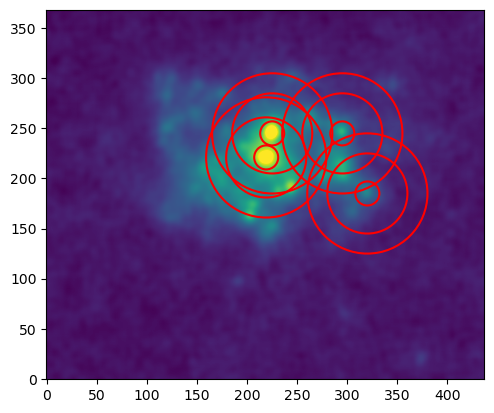

In [351]:
# starting on W4
hdul = fits.open('../Data/imageNGC7793_WISE-Band-4.fits')# for band W4
phdul = hdul[0].data
plt.imshow(phdul, vmax = 152, origin='lower')


#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(225, 245, 12, 40, 60), (219, 221, 12, 40, 60), (320, 185, 12, 40, 60), (295, 245,12, 40, 60)] # (x, y, radius around target, inner r, outer r)
#empty data frame to append values of flux to
#display_data = pd.DataFrame(columns= ['Region', 'X', 'Y', 'Radius', 'Flux (Jy)'])
rows=[]
M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor 

#results
for i, (x, y, r, annulus_inner, annulus_outer) in  enumerate(ROI):
# For the Target object in the little circle
   #define the target aperture objects 
    target_aperture = CircularAperture((x,y),r,)
    
    #perform aperture photometry on target
    target_photo_table = aperture_photometry(phdul, target_aperture)
    target_counts = target_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_trgt = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    target_flux = flx_conv_fact * 10**(Mcal_trgt/-2.5)      #convert Magnitude to Flux
    #calculate area of annulus
    target_area = target_aperture.area



# For the Background Annuli of outside of the Target
    #define the background annulus for the taget (i think i need to do CircularAperture here too tbh)
    annulus_aperture = CircularAnnulus((x, y), annulus_inner, annulus_outer)

    #perform aperture photometry on annuli
    annulus_photo_table = aperture_photometry(phdul, annulus_aperture)
    annulus_counts = annulus_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_annul = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    annulus_flux = flx_conv_fact * 10**(Mcal_annul/-2.5)      #convert Magnitude to Flux

    #calculate area of annulus
    annulus_area = annulus_aperture.area


# do the calculations for including a Background aperture
    
#Calculating the net flux:
    #calculate the mean background per pixel
    bg_perpixel = annulus_flux/annulus_area

    #calculate the total background in the target aperture
    tot_bg = bg_perpixel * target_area

    #Subtract background from the target flux
    net_flx = target_flux - tot_bg
    
    # Append the result as a dictionary to the list named 'rows'
    rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Annulus Inner Radius': annulus_inner, 'Annulus Outer Radius': annulus_outer, 'Net Flux (Jy)': net_flx})  #will prolly have to change the name of the Flux here!!!
    
display_data = pd.DataFrame(rows)
display_data

#visualizing the apertures
for x, y, r, annulus_inner, annulus_outer in ROI:
    target_apertureplt = CircularAperture((x,y),r)
    annulus_apertureplt = CircularAnnulus((x, y), annulus_inner, annulus_outer)
    target_apertureplt.plot(color='red', lw = 1.5)
    annulus_apertureplt.plot(color='red', lw = 1.5)


hdul.close()
display_data


## For Band W3

,Region,X,Y,Radius,Annulus Inner Radius,Annulus Outer Radius,Net Flux (Jy)
0,1,225,245,12,40,60,0.438664
1,2,219,221,12,40,60,0.458583
2,3,320,185,12,40,60,0.412885
3,4,295,245,12,40,60,0.417817


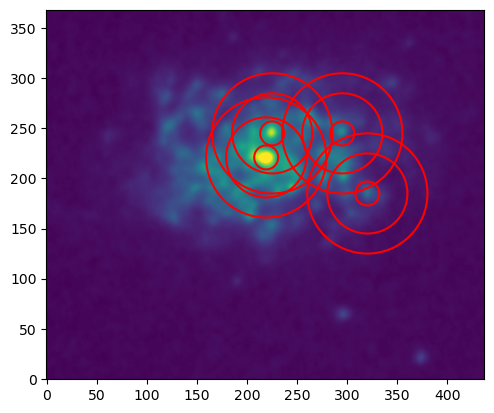

In [350]:

hdul = fits.open('../Data/imageNGC7793_WISE-Band-3.fits')# for band W3
phdul = hdul[0].data
plt.imshow(phdul, vmax = 575, origin='lower')


#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(225, 245, 12, 40, 60), (219, 221, 12, 40, 60), (320, 185, 12, 40, 60), (295, 245,12, 40, 60)] # (x, y, radius around target, inner r, outer r)
#empty data frame to append values of flux to
#display_data = pd.DataFrame(columns= ['Region', 'X', 'Y', 'Radius', 'Flux (Jy)'])
rows=[]
M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor 

#results
for i, (x, y, r, annulus_inner, annulus_outer) in  enumerate(ROI):
# For the Target object in the little circle
   #define the target aperture objects 
    target_aperture = CircularAperture((x,y),r,)
    
    #perform aperture photometry on target
    target_photo_table = aperture_photometry(phdul, target_aperture)
    target_counts = target_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_trgt = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    target_flux = flx_conv_fact * 10**(Mcal_trgt/-2.5)      #convert Magnitude to Flux
    #calculate area of annulus
    target_area = target_aperture.area



# For the Background Annuli of outside of the Target
    #define the background annulus for the taget (i think i need to do CircularAperture here too tbh)
    annulus_aperture = CircularAnnulus((x, y), annulus_inner, annulus_outer)

    #perform aperture photometry on annuli
    annulus_photo_table = aperture_photometry(phdul, annulus_aperture)
    annulus_counts = annulus_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_annul = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    annulus_flux = flx_conv_fact * 10**(Mcal_annul/-2.5)      #convert Magnitude to Flux

    #calculate area of annulus
    annulus_area = annulus_aperture.area


# do the calculations for including a Background aperture
    
#Calculating the net flux:
    #calculate the mean background per pixel
    bg_perpixel = annulus_flux/annulus_area

    #calculate the total background in the target aperture
    tot_bg = bg_perpixel * target_area

    #Subtract background from the target flux
    net_flx = target_flux - tot_bg
    
    # Append the result as a dictionary to the list named 'rows'
    rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Annulus Inner Radius': annulus_inner, 'Annulus Outer Radius': annulus_outer, 'Net Flux (Jy)': net_flx})  #will prolly have to change the name of the Flux here!!!
    
display_data = pd.DataFrame(rows)
display_data

#visualizing the apertures
for x, y, r, annulus_inner, annulus_outer in ROI:
    target_apertureplt = CircularAperture((x,y),r)
    annulus_apertureplt = CircularAnnulus((x, y), annulus_inner, annulus_outer)
    target_apertureplt.plot(color='red', lw = 1.5)
    annulus_apertureplt.plot(color='red', lw = 1.5)


hdul.close()
display_data

## For Band W2

,Region,X,Y,Radius,Annulus Inner Radius,Annulus Outer Radius,Net Flux (Jy)
0,1,225,245,12,40,60,0.013165
1,2,219,221,12,40,60,0.020263
2,3,320,185,12,40,60,0.008359
3,4,295,245,12,40,60,0.009478


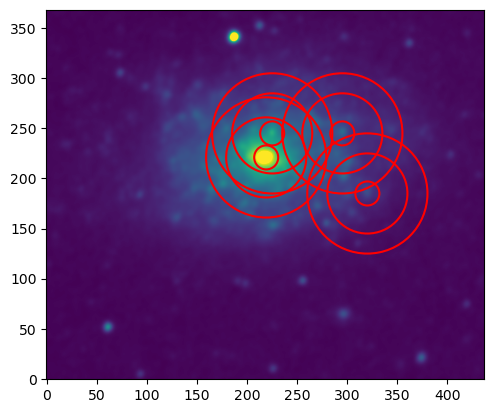

In [349]:
hdul = fits.open('../Data/image_WISE-Band-2.fits')# for band W2
phdul = hdul[0].data
plt.imshow(phdul, vmax = 25, origin='lower')


#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(225, 245, 12, 40, 60), (219, 221, 12, 40, 60), (320, 185, 12, 40, 60), (295, 245,12, 40, 60)] # (x, y, radius around target, inner r, outer r)
#empty data frame to append values of flux to
#display_data = pd.DataFrame(columns= ['Region', 'X', 'Y', 'Radius', 'Flux (Jy)'])
rows=[]
M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor 

#results
for i, (x, y, r, annulus_inner, annulus_outer) in  enumerate(ROI):
# For the Target object in the little circle
   #define the target aperture objects 
    target_aperture = CircularAperture((x,y),r,)
    
    #perform aperture photometry on target
    target_photo_table = aperture_photometry(phdul, target_aperture)
    target_counts = target_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_trgt = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    target_flux = flx_conv_fact * 10**(Mcal_trgt/-2.5)      #convert Magnitude to Flux
    #calculate area of annulus
    target_area = target_aperture.area



# For the Background Annuli of outside of the Target
    #define the background annulus for the taget (i think i need to do CircularAperture here too tbh)
    annulus_aperture = CircularAnnulus((x, y), annulus_inner, annulus_outer)

    #perform aperture photometry on annuli
    annulus_photo_table = aperture_photometry(phdul, annulus_aperture)
    annulus_counts = annulus_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_annul = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    annulus_flux = flx_conv_fact * 10**(Mcal_annul/-2.5)      #convert Magnitude to Flux

    #calculate area of annulus
    annulus_area = annulus_aperture.area


# do the calculations for including a Background aperture
    
#Calculating the net flux:
    #calculate the mean background per pixel
    bg_perpixel = annulus_flux/annulus_area

    #calculate the total background in the target aperture
    tot_bg = bg_perpixel * target_area

    #Subtract background from the target flux
    net_flx = target_flux - tot_bg
    
    # Append the result as a dictionary to the list named 'rows'
    rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Annulus Inner Radius': annulus_inner, 'Annulus Outer Radius': annulus_outer, 'Net Flux (Jy)': net_flx})  #will prolly have to change the name of the Flux here!!!
    
display_data = pd.DataFrame(rows)
display_data

#visualizing the apertures
for x, y, r, annulus_inner, annulus_outer in ROI:
    target_apertureplt = CircularAperture((x,y),r)
    annulus_apertureplt = CircularAnnulus((x, y), annulus_inner, annulus_outer)
    target_apertureplt.plot(color='red', lw = 1.5)
    annulus_apertureplt.plot(color='red', lw = 1.5)


hdul.close()
display_data

## For Band W1

,Region,X,Y,Radius,Annulus Inner Radius,Annulus Outer Radius,Net Flux (Jy)
0,1,225,245,12,40,60,0.017478
1,2,219,221,12,40,60,0.035215
2,3,320,185,12,40,60,0.006456
3,4,295,245,12,40,60,0.009062


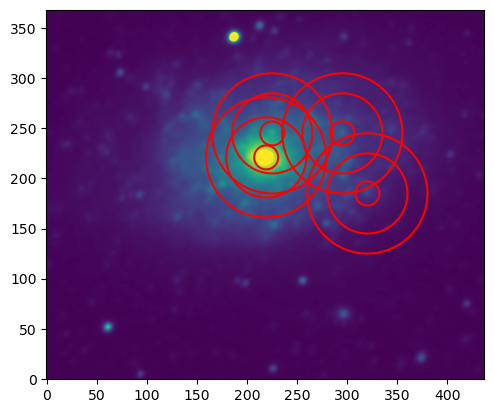

In [344]:
hdul = fits.open('../Data/image_WISE-Band-1.fits')# for band W2
phdul = hdul[0].data
plt.imshow(phdul, vmax = 40, origin='lower')


#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(225, 245, 12, 40, 60), (219, 221, 12, 40, 60), (320, 185, 12, 40, 60), (295, 245,12, 40, 60)] # (x, y, radius around target, inner r, outer r)
#empty data frame to append values of flux to
#display_data = pd.DataFrame(columns= ['Region', 'X', 'Y', 'Radius', 'Flux (Jy)'])
rows=[]
M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor 

#results
for i, (x, y, r, annulus_inner, annulus_outer) in  enumerate(ROI):
# For the Target object in the little circle
   #define the target aperture objects 
    target_aperture = CircularAperture((x,y),r,)
    
    #perform aperture photometry on target
    target_photo_table = aperture_photometry(phdul, target_aperture)
    target_counts = target_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_trgt = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    target_flux = flx_conv_fact * 10**(Mcal_trgt/-2.5)      #convert Magnitude to Flux
    #calculate area of annulus
    target_area = target_aperture.area



# For the Background Annuli of outside of the Target
    #define the background annulus for the taget (i think i need to do CircularAperture here too tbh)
    annulus_aperture = CircularAnnulus((x, y), annulus_inner, annulus_outer)

    #perform aperture photometry on annuli
    annulus_photo_table = aperture_photometry(phdul, annulus_aperture)
    annulus_counts = annulus_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_annul = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    annulus_flux = flx_conv_fact * 10**(Mcal_annul/-2.5)      #convert Magnitude to Flux

    #calculate area of annulus
    annulus_area = annulus_aperture.area


# do the calculations for including a Background aperture
    
#Calculating the net flux:
    #calculate the mean background per pixel
    bg_perpixel = annulus_flux/annulus_area

    #calculate the total background in the target aperture
    tot_bg = bg_perpixel * target_area

    #Subtract background from the target flux
    net_flx = target_flux - tot_bg
    
    # Append the result as a dictionary to the list named 'rows'
    rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Annulus Inner Radius': annulus_inner, 'Annulus Outer Radius': annulus_outer, 'Net Flux (Jy)': net_flx})  #will prolly have to change the name of the Flux here!!!
    
display_data = pd.DataFrame(rows)
display_data

#visualizing the apertures
for x, y, r, annulus_inner, annulus_outer in ROI:
    target_apertureplt = CircularAperture((x,y),r)
    annulus_apertureplt = CircularAnnulus((x, y), annulus_inner, annulus_outer)
    target_apertureplt.plot(color='red', lw = 1.5)
    annulus_apertureplt.plot(color='red', lw = 1.5)


hdul.close()
display_data

**Original code for everything aperture related**

In [ ]:
#For W1
# for multiple apertures while putting in the flux conversion
hdul = fits.open('../Data/image_WISE-Band-1.fits')
phdul = hdul[0].data
plt.imshow(phdul, vmax = 40, origin='lower')

#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(220, 220, 100, 135, 200), (186, 341, 10, 17, 25)] # (x, y, radius around target, inner r, outer r)
#empty data frame to append values of flux to
#display_data = pd.DataFrame(columns= ['Region', 'X', 'Y', 'Radius', 'Flux (Jy)'])
rows=[]
M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor 

#results
for i, (x, y, r, annulus_inner, annulus_outer) in  enumerate(ROI):
# For the Target object in the little circle
   #define the target aperture objects 
    target_aperture = CircularAperture((x,y),r,)
    
    #perform aperture photometry on target
    target_photo_table = aperture_photometry(phdul, target_aperture)
    target_counts = target_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_trgt = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    target_flux = flx_conv_fact * 10**(Mcal_trgt/-2.5)      #convert Magnitude to Flux
    #calculate area of annulus
    target_area = target_aperture.area



# For the Background Annuli of outside of the Target
    #define the background annulus for the taget (i think i need to do CircularAperture here too tbh)
    annulus_aperture = CircularAnnulus((x, y), annulus_inner, annulus_outer)

    #perform aperture photometry on annuli
    annulus_photo_table = aperture_photometry(phdul, annulus_aperture)
    annulus_counts = annulus_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_annul = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    annulus_flux = flx_conv_fact * 10**(Mcal_annul/-2.5)      #convert Magnitude to Flux

    #calculate area of annulus
    annulus_area = annulus_aperture.area


# do the calculations for including a Background aperture
    
#Calculating the net flux:
    #calculate the mean background per pixel
    bg_perpixel = annulus_flux/annulus_area

    #calculate the total background in the target aperture
    tot_bg = bg_perpixel * target_area

    #Subtract background from the target flux
    net_flx = target_flux - tot_bg
    
    # Append the result as a dictionary to the list named 'rows'
    rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Annulus Inner Radius': annulus_inner, 'Annulus Outer Radius': annulus_outer, 'Net Flux (Jy)': net_flx})  #will prolly have to change the name of the Flux here!!!
    
display_data = pd.DataFrame(rows)


#visualizing the apertures
for x, y, r, annulus_inner, annulus_outer in ROI:
    target_apertureplt = CircularAperture((x,y),r)
    annulus_apertureplt = CircularAnnulus((x, y), annulus_inner, annulus_outer)
    target_apertureplt.plot(color='red', lw = 1.5)
    annulus_apertureplt.plot(color='red', lw = 1.5)


hdul.close()
display_data


# Finding the FWHM of sources in the W4 band

also using NGC 7793

In [357]:
from scipy.optimize import curve_fit
from photutils.detection import DAOStarFinder
from astropy.stats import mad_std, sigma_clipped_stats

from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
# look at A) Research with Roy/Code/Lab4code(2and3)-Copy1.ipynb

(148.56389, 148.53787, 0.113534294)


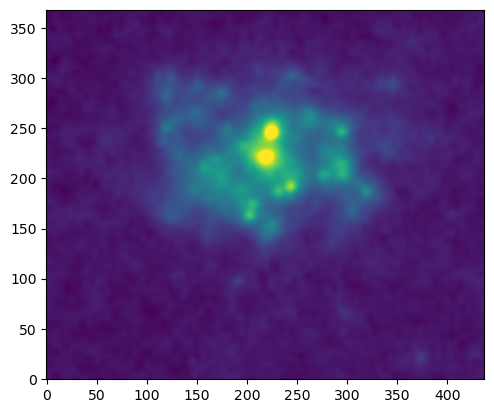

In [358]:
# identify sources in the image
#DOAstarfinder vs IRAFstarfinder. DOA is prolly better. look at the doc you created titled FWHM for more info
# starting on W4
hdul = fits.open('../Data/imageNGC7793_WISE-Band-4.fits')# for band W4
phdul = hdul[0].data
plt.imshow(phdul, vmax = 152, origin='lower')


mean, median, std = sigma_clipped_stats(phdul, sigma=3.0)  
print((mean, median, std))


In [379]:
# subtract the background and find FWHM of sources at a certain threshold
#started at fwhm= 3 and threshold = 5
daofind = DAOStarFinder(fwhm=3.0, threshold=.7*std) # find the stars in the image that have FWHMs of around 3 pixels and have peaks approximately 5-sigma above the background. 
sources = daofind(phdul - median)  
print(type(sources))
# will likely run into iissues in the code below
for col in sources.colnames:  
    if col not in ('id', 'npix'):
        sources[col].info.format = '%.2f'  # for consistent table output
sources.pprint(max_width=3000)  

#likely the flux labeled in this is not converted!

hdul.close()

<class 'astropy.table.table.QTable'>
 id xcentroid ycentroid sharpness roundness1 roundness2 npix sky  peak flux  mag 
--- --------- --------- --------- ---------- ---------- ---- ---- ---- ---- -----
  1    202.77    163.58      0.37      -0.02       0.12   25 0.00 2.45 1.47 -0.42
  2    231.53    187.29      0.37      -0.02      -0.08   25 0.00 2.24 1.02 -0.03
  3    243.54    191.98      0.38      -0.01       0.07   25 0.00 2.96 1.75 -0.61
  4    219.35    221.02      0.38       0.02      -0.16   25 0.00 4.50 1.93 -0.72
  5    224.46    245.69      0.39       0.00       0.12   25 0.00 4.92 3.34 -1.31
  6    294.29    246.40      0.39      -0.02       0.09   25 0.00 2.17 1.49 -0.43


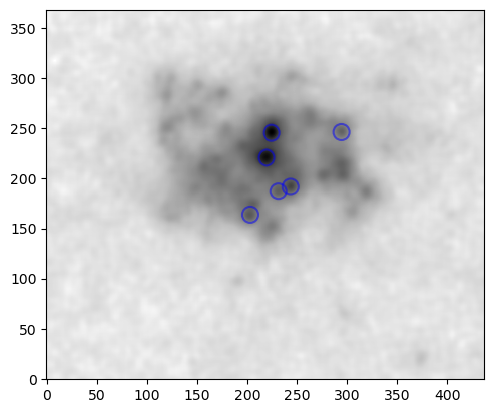

In [383]:
# plot the image with marked locations of all the sources it detected.
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=8.0)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(phdul, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')
apertures.plot(color='blue', lw=1.5, alpha=0.5)

In [ ]:

amp = sources['peak']

#define the 2d gaussian. look at your docs more more of an xpplanation, but sigma_x and sigma_y are just the std's of the x and y centroids. 
## generally good to make a guess of around 3 pixels 
### xo and yo are the exact same as x and y so you don't need to make another guess with them.

def gaussian2d(xy, xo, yo, amp, sigma_x, sigma_y, theta, offset):
    x, y = xy
    xo = float(xo)
    yo = float(yo)

    #break up 'g' into smaller components a, b, and c
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -( (np.sin(theta)*np.cos(theta)) / (2*sigma_x**2) ) + ( (np.sin(theta)*np.cos(theta)) / (2*sigma_y**2) )
    c = ((np.sin(theta)**2) / (2*sigma_x**2)) + ((np.cos(theta)**2) / (2*sigma_y**2))
    
    #put them all back into g
    g = offset + amp*np.exp( - ( (a(x-xo)**2) + (2*b*(x-xo)*(y-yo)) + (c*(y-yo)**2) ) )
    return g.ravel()

# if something goes wrong in the code, it is more than likely due to the gaussian function you defined.
# you may need to make an initial guess for xo and yo if it doesn't work. but leave their initial guesses empty for now.

In [ ]:
#Fit the gaussian to the region around each source
fwhms = []
aperture_radius = 8

#loop over each source to fit the gaussian and determine the fwhm
for source in sources:
    x, y = sources['xcentroid'], sources['ycentroid']

    #define the bounding box around the source so you can make a mesh grid. 
    ##by subtracting the aperture radius from the maximum of the centroid of x (meaning the center of the aperture in the x axis) it allows you to get the minimum distance from the center needed. and vice versa for the maximum
    ##the reason you use the image_data.shape[1] is because you need to know the shape and size of the image so that the gaussian does not fit to sources outside the image.
    ## in doing all of this, you ensure that the box around the source stays within the image which is especially useful for sources at the edge of the image!
    x_min = max(int(x)- aperture_radius, 0)
    x_max = min(int(x) + aperture_radius, phdul.data[1])
    y_min = max(int(y) - aperture_radius, 0)
    y_max = min(int(y)+ aperture_radius, phdul.data[1])

    #extract the region relevant for fitting
    region = phdul[y_min:y_max, x_min:x_max]
    
    #create meshgrid for the region
    x_region = np.linspace(x_min, x_max - 1, x_max - x_min)
    y_region = np.linspace(y_min, y_max - 1, y_max - y_min)
    x_region, y_region = np.meshgrid(x_region, y_region)

    # initial guesses for the parameters of the 2d gaussian and curve_fit. using np.median because you want the middle of the aperture.
    initial_guess = (amp, x, y, 3, 3, 0, np.median(region))

    #fit the gaussian model
    try:
        optimal_parameters, covariance_parameters = curve.fit(gaussian2d, (x_region, y_region), region.ravel(), p0 = initial_guess )
        except RuntimeError:
            print(f" Could not fit gaussian for source at ({x}, {y})")
            continue
    #extract the sigmas from the optimal parameters
    sigma_x, sigma_y = optimal_parameters[3], optimal_parameters[4]
    
    #calculate the FWHM
    fwhm_y = 2.3548 * sigma_y
    fwhm_x = 2.3548 * sigma_x
    fwhm = np.mean(fwhm_x, fwhm_y)
    fwhms.append(fwhm)

    print()








# for visualizing the aperutrues, i wonder if there is a way to loop over all of the radii and then plot it.

In [ ]:
# example of  Determining the extraction region for aperture photometry
   #the 1.5 is there because you want to ensure that it encompasses all of the sources light and flux but also does not capture the background. 
   ## it makes sure you cover the source adequately, so you can def change i if you think you encompass too much or too little.
    aperture_radius = 1.5 * fwhm

# Putting it all together

scraping through the WISE image set and pulling all 74 galaxies in all four Wavelengths

**Outline**
- pull all of the images and their Wavelengths
- for each galaxy
    - run the aperture photometry for each Band wavelength of the observed galaxy. Starting with the 4th band.